# Считайте датасет из файла train.csv (это данные о выживаемости на Титанике) - 1 балл

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
name_of_file='train.csv'
path = '/content/drive/My Drive/Colab Notebooks/'+ name_of_file

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(path)

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch - 2 балла

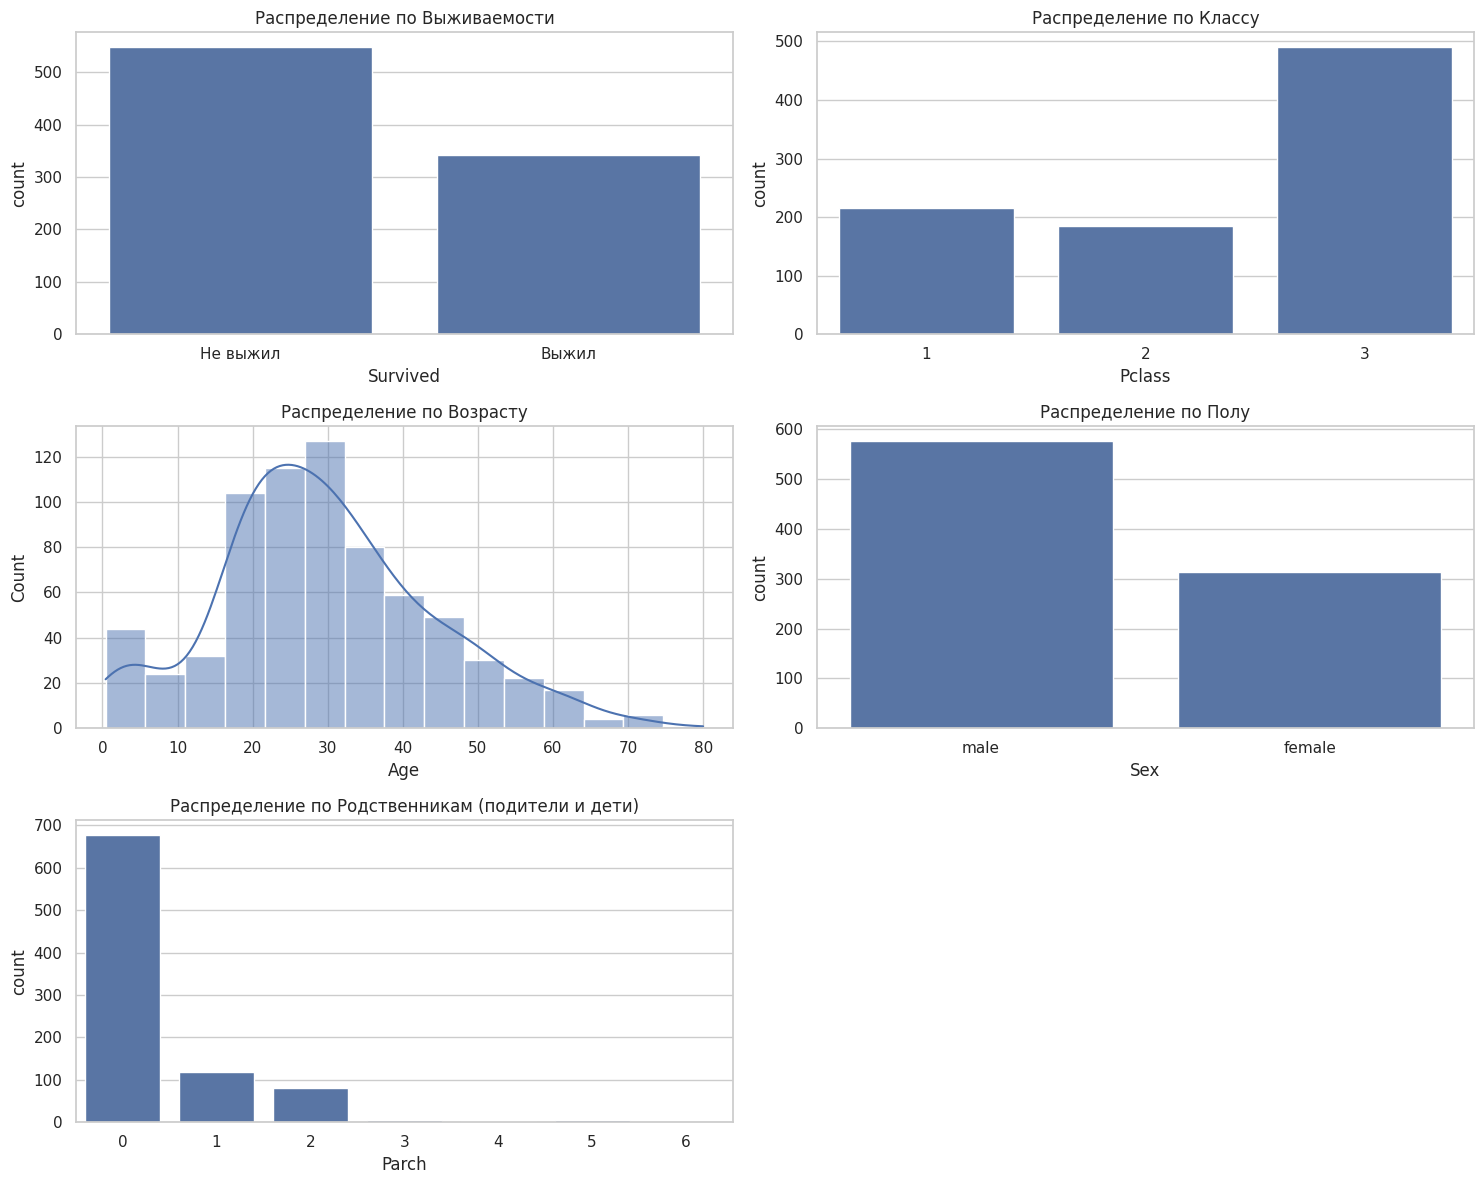

In [10]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

sns.countplot(x='Survived', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Распределение по Выживаемости')
axs[0, 0].set_xticks([0, 1])
axs[0, 0].set_xticklabels(['Не выжил', 'Выжил'])

sns.countplot(x='Pclass', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Распределение по Классу')

sns.histplot(df['Age'], bins=15, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Распределение по Возрасту')

sns.countplot(x='Sex', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Распределение по Полу')

sns.countplot(x='Parch', data=df, ax=axs[2, 0])
axs[2, 0].set_title('Распределение по Родственникам (подители и дети)')

fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()

# Постройте график типа boxplot для столбца Age - 1 балл

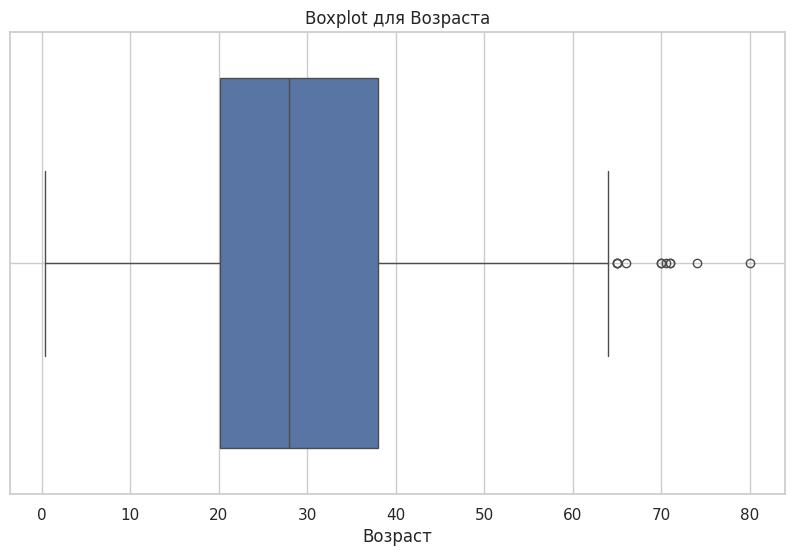

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])

plt.title('Boxplot для Возраста')
plt.xlabel('Возраст')
plt.grid(True)

plt.show()

# Проинтепретируйте полученный график - 1 балл

На графике представлен boxplot для возрастной категории пассажиров Титаника. Мы видим, что основная часть пассажиров имеет возраст в пределах от 20 до 37-40 лет.

Квадрат, обозначающий интерквартильный размах (IQR), отражает центральную часть данных, где находится 50% пассажиров. Данные показывают, что медианный возраст пассажиров составляет примерно 30-31 год, указывая на доминирующую возрастную группу среди пассажиров Титаника.

Дополнительно, можно заметить небольшую, но четко выделяющуюся группу людей старшего возраста, придерживающихся возраста свыше 60 лет. Эти наблюдения выделяются на графике как потенциальные выбросы. Однако следует упомянуть, что их наличие не обязательно указывает на ошибки в данных. Скорее, это может отражать разнообразие возрастного состава на борту. Такие выбросы часто рассматриваются как аномалии, но в данном случае данные о пассажирах старше 60 лет могут быть вполне нормальными.

# Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах - 1 балл

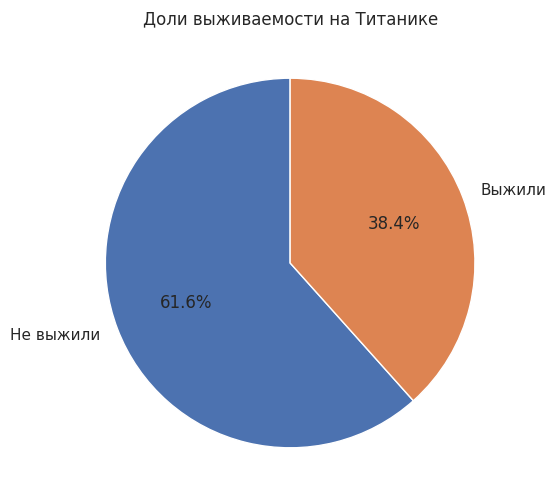

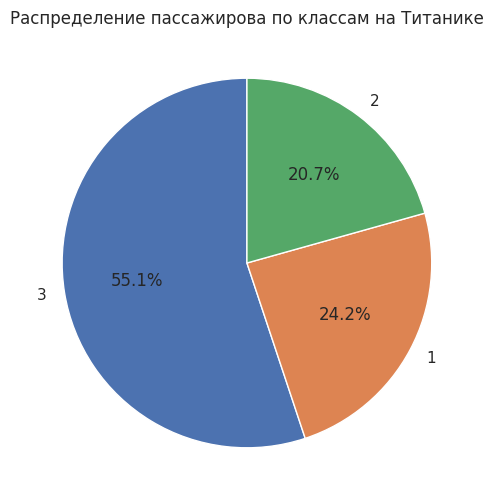

In [17]:
survived_counts = df['Survived'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['Не выжили', 'Выжили'], autopct='%1.1f%%', startangle=90)
plt.title('Доли выживаемости на Титанике')
plt.show()

pclass_counts = df['Pclass'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение пассажирова по классам на Титанике')
plt.show()

# Постройте график типа pairplot для всех числовых переменных датасета - 1 балл

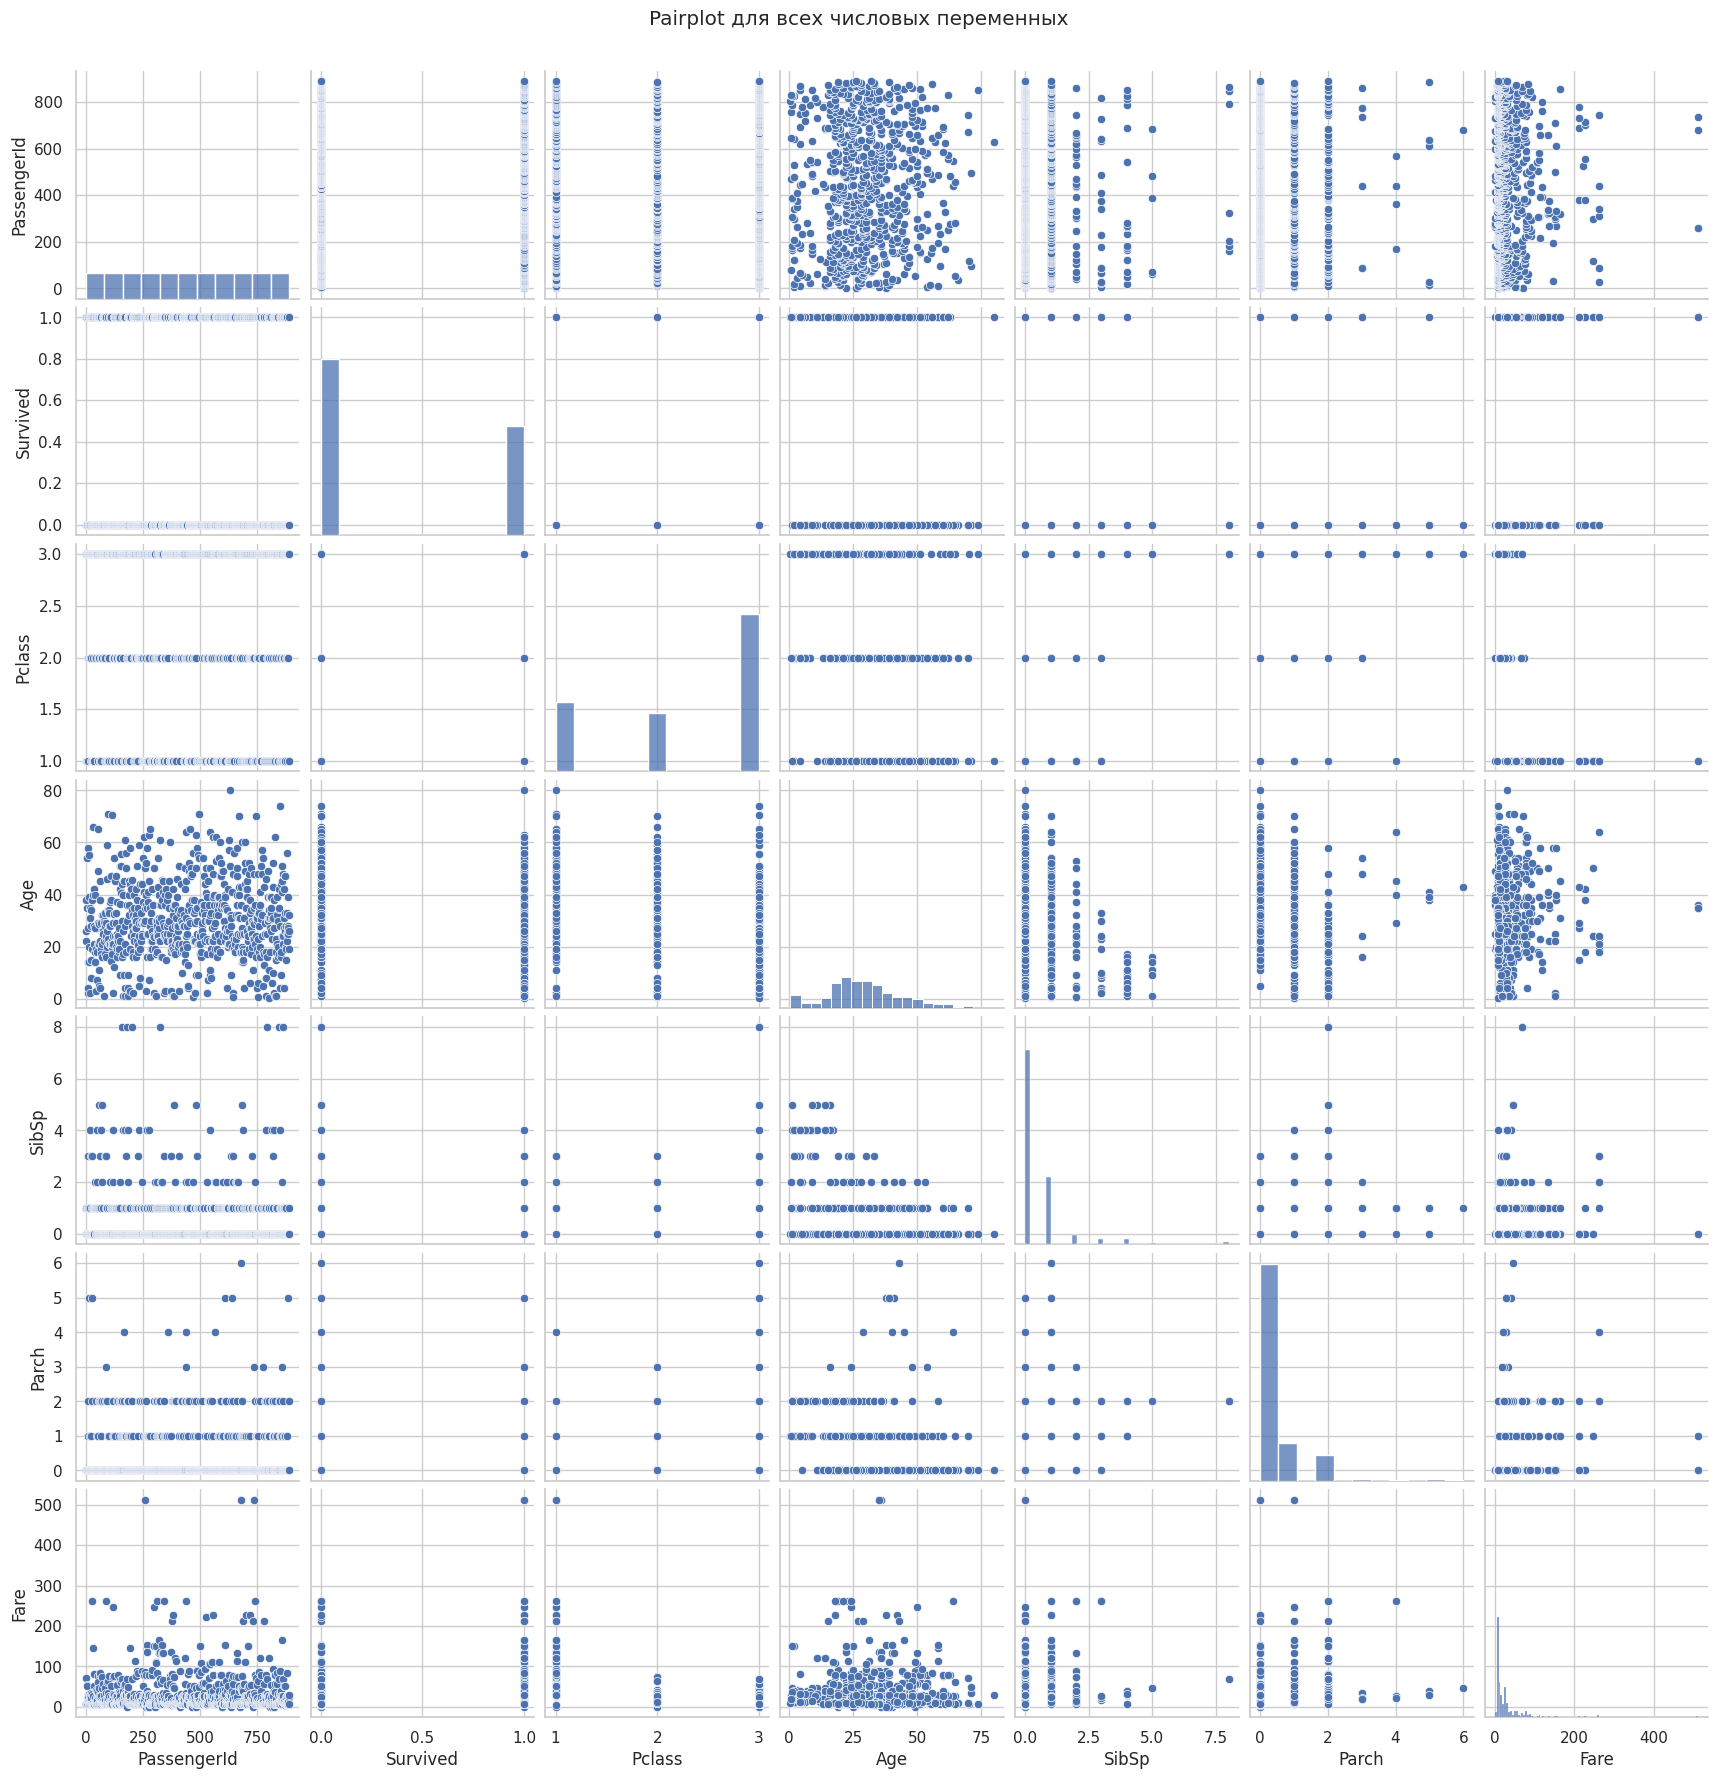

In [23]:
sns.pairplot(df)
plt.suptitle('Pairplot для всех числовых переменных', y=1.02)
plt.show()

# Постройте интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе - 2 балла

In [24]:
import plotly.express as px

In [26]:
sunburst_data = df.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')

fig = px.sunburst(sunburst_data, path=['Pclass', 'Sex'], values='Count', title='Количество пассажиров по классам и полу')
fig.show()

# Снабдите все построенные графики наименованиями (title), подписями осей, легендами - 1 балл

Вроде бы везде, где нужно все подписано.